In [23]:
import mysql.connector as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [11]:
db = sql.connect(host = 'localhost', user = 'root', password = 'Bastards', database = 'hr')

In [12]:
mycursor = db.cursor()

In [13]:
# task 1 python + SQL query to fetch the names and regions of countries

mycursor.execute("select country_name, region_name from countries join regions on countries.region_id = regions.region_id")
mycursor.fetchall()

[('Belgium', 'Europe'),
 ('Switzerland', 'Europe'),
 ('Germany', 'Europe'),
 ('Denmark', 'Europe'),
 ('France', 'Europe'),
 ('Italy', 'Europe'),
 ('Netherlands', 'Europe'),
 ('United Kingdom', 'Europe'),
 ('Argentina', 'Americas'),
 ('Brazil', 'Americas'),
 ('Canada', 'Americas'),
 ('Mexico', 'Americas'),
 ('United States of America', 'Americas'),
 ('Australia', 'Asia'),
 ('China', 'Asia'),
 ('HongKong', 'Asia'),
 ('India', 'Asia'),
 ('Japan', 'Asia'),
 ('Singapore', 'Asia'),
 ('Egypt', 'Middle East and Africa'),
 ('Israel', 'Middle East and Africa'),
 ('Kuwait', 'Middle East and Africa'),
 ('Nigeria', 'Middle East and Africa'),
 ('Zambia', 'Middle East and Africa'),
 ('Zimbabwe', 'Middle East and Africa')]

In [14]:
# task 2 part 1 Visualize city and countrywise count  of emplyees without using joins and push the generated dataframe to MySQL

DF1 = pd.read_sql_query("select employee_id, department_id from employees", db)
DF2 = pd.read_sql_query("select department_id, location_id from departments", db)
DF3 = pd.read_sql_query("select location_id, country_id from locations", db)
DF4 = pd.read_sql_query("select country_id, country_name from countries", db)

In [15]:
# task 2 part 2

DFA = pd.merge(DF1, DF2)
DFA

,employee_id,department_id,location_id
0,200,10.0,1700
1,201,20.0,1800
2,202,20.0,1800
3,114,30.0,1700
4,115,30.0,1700
...,...,...,...
101,111,100.0,1700
102,112,100.0,1700
103,113,100.0,1700
104,205,110.0,1700


In [16]:
# task 2 part 3

DFAB = pd.merge(DFA, DF3)
DFAB

,employee_id,department_id,location_id,country_id
0,200,10.0,1700,US
1,114,30.0,1700,US
2,115,30.0,1700,US
3,116,30.0,1700,US
4,117,30.0,1700,US
...,...,...,...,...
101,174,80.0,2500,UK
102,175,80.0,2500,UK
103,176,80.0,2500,UK
104,177,80.0,2500,UK


In [17]:
# task 2 part 4

DFALL = pd.merge(DFAB, DF4)

DFF = DFALL.groupby(by = 'country_name')[['employee_id']].count()
DFF

,employee_id
country_name,
Canada,2
Germany,1
United Kingdom,35
United States of America,68


In [18]:
# task 2 part 5

hostname = "localhost"
dbname = "hr"
username = 'root'
password = 'Bastards'

engine=create_engine(f"mysql+pymysql://{username}:{password}@{hostname}/{dbname}")

DFF.to_sql("CountryWiseEmpCount" , engine, index = False)


4

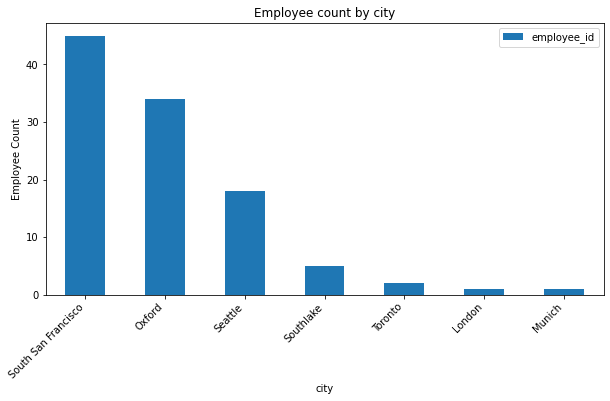

In [36]:
# task 3 Visual representation of employee count according to city and country

t3 = pd.read_sql_query("select city,location_id from locations", db)
t3a = pd.merge(DFALL, t3)
t3b = t3a.groupby(by='city')[['employee_id']].count().sort_values(by='employee_id',ascending=False)
t3b.plot(kind = 'bar', figsize = (10, 5), ylabel = 'Employee Count', title = 'Employee count by city')
plt.xticks(rotation=45, ha='right');

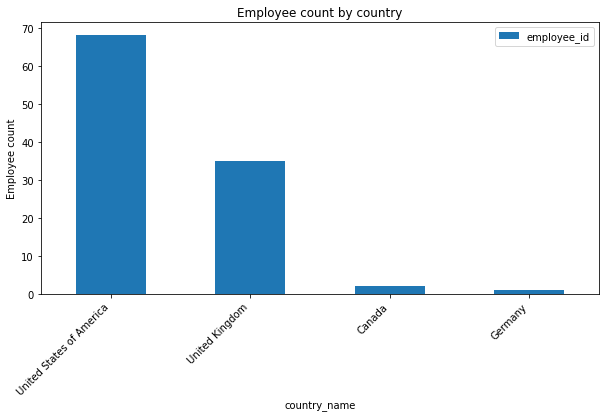

In [35]:
t3c = t3a.groupby(by='country_name')[['employee_id']].count().sort_values(by='employee_id',ascending=False)
t3c.plot(kind = 'bar', figsize = (10, 5), ylabel = 'Employee count', title = 'Employee count by country')
plt.xticks(rotation=45, ha='right');